# [NetworkX](https://networkx.github.io/) Tutorial 1

In this course, we will primarily rely on NetworkX v2.5. If you want to work with NetworkX on your machine outside the provided Jupyter notebooks, you can use pip to either upgrade to the latest version (currently 2.5) or specify that you want to install 2.5. Both commands are shown below. If you only need to work with NetworkX within the notebooks provided as part of this course, then there's nothing else you need to do. The framework provided by Coursera handles the install for you.

```bash
foo@bar:~$ pip install --upgrade networkx
```

```bash
foo@bar:~$ pip install networkx==2.5
```

The official documentation for `networkx` can be found [here](https://networkx.github.io/documentation/stable/) and an official tutorial is available [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Basics

- Graph
- Nodes
- Edges

### Graph

The main component of NetworkX is the graph object. NetworkX supports several [graph types](https://networkx.github.io/documentation/stable/reference/classes/index.html#graph-types). We can create an empty undirected graph by:

In [2]:
G = nx.Graph()

Learn more about G

In [3]:
G?

Similarly, we can also create a digraph or a multigraph:

In [4]:
DiG = nx.DiGraph()
MuG = nx.MultiGraph()

Learn more about MuG

In [5]:
MuG?

### Nodes

We can add nodes to a graph one at a time or by adding a list of nodes simultaneously:

In [6]:
G.add_node(1) # add a single node
G.add_nodes_from([2, 3, 4, 5, 6, 7, 8, 9, 0]) # add a list of nodes

We can retrieve the nodes of a graph object `G` directly with:

In [7]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 0))

We can also remove nodes if we don't want some of them using `Graph.remove_node()` or `Graph.remove_nodes_from()`.

In [8]:
G.remove_node(6)
G.nodes

NodeView((1, 2, 3, 4, 5, 7, 8, 9, 0))

### Edges

Similar to the process of adding nodes, we can add edges to a graph. Each edge is specified by a pair of nodes.

In [9]:
G.add_edge(1, 2) # add a single edge
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3,5), 
                  (3, 7), (4,8), (5,9),(5,0),(6,0),(7,8),(8,9)]) # add a list of edges

Similarly, we retrieve the edges with:

In [10]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 7), (4, 8), (5, 9), (5, 0), (7, 8), (8, 9), (0, 6)])

Or the edges of specific nodes:

In [11]:
G.edges(2) # all edges related to node 2

EdgeDataView([(2, 1), (2, 4), (2, 5)])

Edges can be removed similarly to the way they are added, with `Graph.remove_edge()` or `Graph.remove_edges_from()`.

In [12]:
G.remove_edge(1, 2)
G.edges

EdgeView([(1, 3), (2, 4), (2, 5), (3, 5), (3, 7), (4, 8), (5, 9), (5, 0), (7, 8), (8, 9), (0, 6)])

## Adding attributes

We can assign attributes to graphs, nodes, and edges. You can set the name of attributes as you wish. For example, adding an attribute called "name" to graph G:

In [13]:
G.graph['name'] = "My first graph"
G.graph

{'name': 'My first graph'}

Similarly, we can add attributes for nodes and edges:

In [14]:
G.add_node(6, color='red') # add a node with color attribute "red"
G.nodes[1]['color'] = 'green' # add color "green" attribute to node 1

You can quickly view all node attributes by passing `data=True` like so:

In [15]:
G.nodes(data=True)

NodeDataView({1: {'color': 'green'}, 2: {}, 3: {}, 4: {}, 5: {}, 7: {}, 8: {}, 9: {}, 0: {}, 6: {'color': 'red'}})

Here we are adding attributes to edges in a fashion similar to what we did above:

In [16]:
G.add_edge(1, 2, weight=0.7) # add an edge of weight attribute 0.7
G.edges()[(1,2)]

{'weight': 0.7}

In [17]:
G.add_edges_from([(3, 4), (4, 5), (3, 6), (5, 6)], weight=0.3)        # add edges of weight attribute 0.3
G.add_edges_from([(1, 5, {'weight': 0.5}), (1, 4, {'weight': 0.8})])  # add edges of different weights

In [18]:
G.edges(data=True)

EdgeDataView([(1, 3, {}), (1, 2, {'weight': 0.7}), (1, 5, {'weight': 0.5}), (1, 4, {'weight': 0.8}), (2, 4, {}), (2, 5, {}), (3, 5, {}), (3, 7, {}), (3, 4, {'weight': 0.3}), (3, 6, {'weight': 0.3}), (4, 8, {}), (4, 5, {'weight': 0.3}), (5, 9, {}), (5, 0, {}), (5, 6, {'weight': 0.3}), (7, 8, {}), (8, 9, {}), (0, 6, {})])

If we want to create a signed graph to reflect positive/negative relationships between nodes we can add weighted edges to a directed graph by specifying a list of 3-tuples containing (source_node, target_node, value).

In [19]:
DiG.add_weighted_edges_from(
    [(1, 2, -10),(2, 1, 0),(2, 3, 1),(3, 1, -3),(1, 3, -5),
    (1, 4, 8), (2, 4, 2), (3, 4, 5)]) # add 3-tuples containing <source node>, <target node>, <value>

DiG.edges(data=True)

OutEdgeDataView([(1, 2, {'weight': -10}), (1, 3, {'weight': -5}), (1, 4, {'weight': 8}), (2, 1, {'weight': 0}), (2, 3, {'weight': 1}), (2, 4, {'weight': 2}), (3, 1, {'weight': -3}), (3, 4, {'weight': 5})])

## Drawing graphs

NetworkX provides various types of graph drawing tools for us to customize the visualization of graphs. For example, we can change the graph layout, node colors, size, edge types, colors, labels, fonts, etc. More details can be found [here](https://networkx.github.io/documentation/stable/reference/drawing.html). 

As a simple example, we can plot the previous graph we created using `nx.draw_networkx()`:

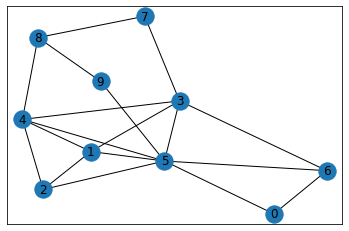

In [20]:
nx.draw_networkx(G)

`nx.draw_networkx()` is a very simple function for drawing graphs. Actually, `networkx` provides several parameters for customizing the appearance of the drawings. 
You can refer to this [page](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for detailed explanations. 

Some commonly used parameters are:

- `pos`, the layout of a graph. There are several layouts to choose from, for example, `nx.circular_layout(G)`.
- `with_labels`, whether to label the nodes or not
- `node_color`, `node_shape`, `node_size`: specify the color, shape and sizes of nodes
- `alpha`: specify the transparency of the plot

We are now going to try out a few of the parameters.

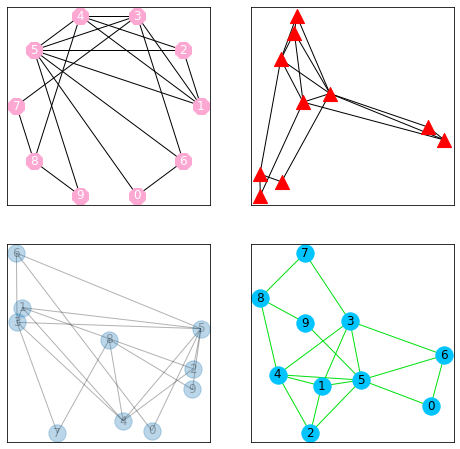

In [21]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(221)
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True, node_shape='8', node_color='#FDA7D3', font_color='white')

plt.subplot(222)
nx.draw_networkx(G, pos=nx.spectral_layout(G), with_labels=False, node_shape='^', node_color='red', node_size=200)

plt.subplot(223)
nx.draw_networkx(G, pos=nx.random_layout(G), with_labels=True, alpha=0.3)

plt.subplot(224)
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True, edge_color="#00E10F", node_color='#00C4FF')


## Graph generators

In addition to building a graph from scratch, we can use graph generators to conveniently create specific kinds of graphs. For example, NetworkX provides several popular small networks:

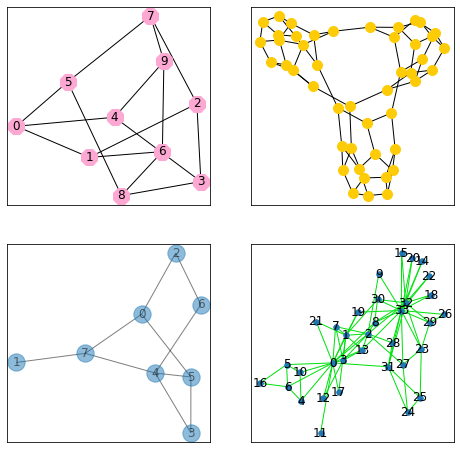

In [22]:
fig = plt.figure(figsize=(8, 8))
petersen = nx.petersen_graph()
plt.subplot(221)
nx.draw_networkx(petersen, with_labels=True, node_shape='8', node_color='#FDA7D3')

tutte = nx.tutte_graph()
plt.subplot(222)
nx.draw_networkx(tutte, with_labels=False, node_color='#FDCC07', node_size=100)

maze = nx.sedgewick_maze_graph()
plt.subplot(223)
nx.draw_networkx(maze, with_labels=True, alpha=0.5)

tet = nx.karate_club_graph()
plt.subplot(224)
nx.draw_networkx(tet, with_labels=True, edge_color="#00E10F", node_size=30)

## Loading a graph from file

In addition to manually configuring a graph ourselves, we can load an existing graph from a file. NetworkX supports a number of different formats. Refer to [this page](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) for more information.

For example, one of the methods is to load a graph from a GML(Graph Modelling Language) format file:
```python
nx.read_gml(path_to_file)
```
Here we load the `florentine_families.gml` file, which describes the relationships of famous families in Firenze, Italy.

In [23]:
G = nx.read_gml('assets/florentine_families.gml')
G.nodes

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

We can also visualize the data:

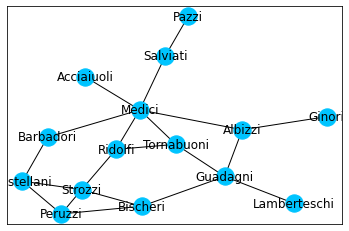

In [24]:
nx.draw_networkx(G, with_labels=True, node_color='#00C4FF')

## Basic graphs properties

Networkx allows us to measure various properties of a graph. Take the Florentine families graph in the previous section as an example, we can obtain the degree of each node using either `nx.degree(G)` or `G.degree()`.

In [25]:
nx.degree(G)

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [26]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

For a directed graph we can find the in & out degrees using the following.

In [27]:
DiG.in_degree()

InDegreeView({1: 2, 2: 1, 3: 2, 4: 3})

In [28]:
DiG.out_degree()

OutDegreeView({1: 3, 2: 3, 3: 2, 4: 0})

We can compute the diameter of the graph with `nx.diameter`:

In [29]:
nx.diameter(G)

5

We can compute the shortest paths between all pairs of nodes using `nx.shortest_path`

In [30]:
nx.shortest_path(G)

{'Acciaiuoli': {'Acciaiuoli': ['Acciaiuoli'],
  'Medici': ['Acciaiuoli', 'Medici'],
  'Barbadori': ['Acciaiuoli', 'Medici', 'Barbadori'],
  'Ridolfi': ['Acciaiuoli', 'Medici', 'Ridolfi'],
  'Tornabuoni': ['Acciaiuoli', 'Medici', 'Tornabuoni'],
  'Albizzi': ['Acciaiuoli', 'Medici', 'Albizzi'],
  'Salviati': ['Acciaiuoli', 'Medici', 'Salviati'],
  'Castellani': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani'],
  'Strozzi': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi'],
  'Guadagni': ['Acciaiuoli', 'Medici', 'Tornabuoni', 'Guadagni'],
  'Ginori': ['Acciaiuoli', 'Medici', 'Albizzi', 'Ginori'],
  'Pazzi': ['Acciaiuoli', 'Medici', 'Salviati', 'Pazzi'],
  'Peruzzi': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
  'Bischeri': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi', 'Bischeri'],
  'Lamberteschi': ['Acciaiuoli',
   'Medici',
   'Tornabuoni',
   'Guadagni',
   'Lamberteschi']},
 'Medici': {'Medici': ['Medici'],
  'Acciaiuoli': ['Medici', 'Acciaiuoli'],
  'Barbadori': 

When you primarily care about the actual distance rather than the shortest paths you can use `nx.shortest_path_length`, which returns 2-tuples consisting of (node identifier, dictionary where keys=node identifier & values = shortest path length).

In [31]:
[i for i in nx.shortest_path_length(G)][:2]

[('Acciaiuoli',
  {'Acciaiuoli': 0,
   'Medici': 1,
   'Ridolfi': 2,
   'Albizzi': 2,
   'Barbadori': 2,
   'Salviati': 2,
   'Tornabuoni': 2,
   'Pazzi': 3,
   'Strozzi': 3,
   'Castellani': 3,
   'Ginori': 3,
   'Guadagni': 3,
   'Lamberteschi': 4,
   'Bischeri': 4,
   'Peruzzi': 4}),
 ('Medici',
  {'Medici': 0,
   'Ridolfi': 1,
   'Acciaiuoli': 1,
   'Albizzi': 1,
   'Barbadori': 1,
   'Salviati': 1,
   'Tornabuoni': 1,
   'Pazzi': 2,
   'Strozzi': 2,
   'Castellani': 2,
   'Ginori': 2,
   'Guadagni': 2,
   'Lamberteschi': 3,
   'Bischeri': 3,
   'Peruzzi': 3})]

You can also compute the average shortest path length in a graph: 

In [32]:
nx.average_shortest_path_length(G)

2.4857142857142858

We can determine the common neighbors shared by two nodes:

In [33]:
list(nx.common_neighbors(G, 'Ridolfi', 'Tornabuoni'))

['Medici']

Sometimes the graph may not be connected, and we may be interested in how many components it has. We can examine this with `number_connected_components`. To make its function more obvious, let's first remove the node "Medici" and see how it looks:

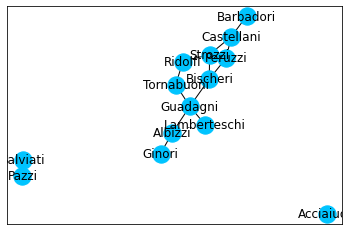

In [34]:
G.remove_node('Medici')
nx.draw_networkx(G, with_labels=True, node_color='#00C4FF')

As we can see, the graph has 3 connected components. This result can be confirmed using the `number_connected_components` function:

In [35]:
nx.number_connected_components(G)

3

When working with directed graphs we may be interested in the strongly or weakly connected components. NetworkX provides functionality to access generators that return sets of nodes in such components as well as convenience functions that simply return the number of such components in the graph.

In [36]:
list(nx.strongly_connected_components(DiG))
#[i for i in nx.strongly_connected_components(DiG)] # this is an equivalent list comprehension

[{4}, {1, 2, 3}]

In [37]:
nx.number_strongly_connected_components(DiG)

2

## Algorithms

`networkx` features an abundance of algorithms. In this part, we will work with several functions including some we'll use in assignment 1.

We use a graph generator from NetworkX to create a random graph. Here we use the function [`nx.generators.random_graphs.dense_gnm_random_graph(n, m)`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html), which generates a random graph $G(V, E)$ with nodes $V$ and edges $E$, where $|V| = n$ and $|E|=m$. For our example, the graph will have 1,000 nodes and 5,000 edges. You do not need to worry about how $G$ is constructed. We will learn more about graph generative models in Week 2. 

In [38]:
G = nx.generators.random_graphs.dense_gnm_random_graph(n=1000, m=5000)

To see the graph we have created, we could use `networkx_draw_network` to visualize it. However, for large graphs, this may not generate a very informative visualization. Let's try it:

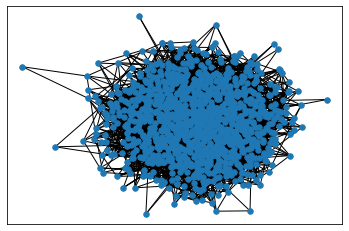

In [39]:
nx.draw_networkx(G, node_size=30, with_labels=False)

Instead, we can use different measures to explore the graph's characteristics. For example, we can use `networkx.degree_histogram` to group nodes by their degree and plot the degree distribution:

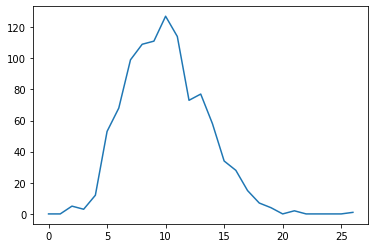

In [40]:
hist = nx.degree_histogram(G)
plt.plot(hist);

### Breadth-first search
Another way of assessing distance in a graph is through breadth-first search which calculates distances in terms of "layers" spreading outward from a given ego node. The ego node is indicated via the 'source' parameter and you can limit the depth of the search (how many layers) using 'depth_limit'.

In [41]:
this_tree = nx.bfs_tree(G, source=5, depth_limit=2)
this_tree.edges()

OutEdgeView([(5, 168), (5, 222), (5, 451), (5, 483), (5, 508), (5, 540), (5, 585), (5, 720), (5, 807), (5, 963), (168, 2), (168, 79), (168, 258), (168, 536), (168, 638), (168, 738), (168, 802), (168, 839), (168, 851), (222, 172), (222, 173), (222, 392), (222, 755), (222, 918), (222, 965), (451, 11), (451, 52), (451, 200), (451, 247), (451, 251), (451, 374), (451, 380), (451, 411), (451, 449), (451, 710), (451, 750), (451, 809), (451, 971), (483, 524), (483, 606), (483, 644), (483, 859), (483, 973), (508, 310), (508, 436), (508, 460), (508, 593), (508, 814), (508, 924), (508, 953), (508, 984), (540, 116), (540, 175), (540, 605), (540, 688), (540, 721), (540, 722), (540, 752), (540, 834), (540, 885), (540, 915), (540, 928), (585, 90), (585, 357), (585, 384), (585, 388), (585, 464), (585, 487), (585, 498), (585, 576), (585, 610), (585, 679), (585, 776), (585, 777), (585, 789), (720, 81), (720, 130), (720, 166), (720, 193), (720, 255), (720, 256), (720, 493), (720, 520), (720, 590), (720, 

### Centrality measures

NetworkX provides several centrality algorithms to measure the importance of nodes. The complete list of functions can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html). In this tutorial, we focus on the three measurements,

```python
nx.degree_centrality
nx.closeness_centrality
nx.betweenness_centrality
nx.pagerank
nx.hits
```

`nx.degree_centrality` returns a dictionary where keys are the name of nodes and values are the node's degree centrality value. For example, 

In [42]:
deg_dict = nx.degree_centrality(G)
print(f"The degree centrality of node {42} is {deg_dict[42]}")

The degree centrality of node 42 is 0.005005005005005005


Similarly, we can calculate in and out-degree centrality for a directed graph with `nx.in_degree_centrality()` and `nx.out_degree_centrality`, respectively.

In [43]:
nx.in_degree_centrality(DiG)

{1: 0.6666666666666666, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 1.0}

In [44]:
nx.out_degree_centrality(DiG)

{1: 1.0, 2: 1.0, 3: 0.6666666666666666, 4: 0.0}

`closeness_centrality` returns a dictionary where keys are the names of the nodes and the values are the calculated centrality values.

In [45]:
clos_dict = nx.closeness_centrality(G)
print(f"The closeness centrality of node {42} is {clos_dict[42]}")

The closeness centrality of node 42 is 0.2846964947278427


`betweenness_centrality` returns a dictionary where keys are the names of the nodes and the values are the calculated centrality values.

In [46]:
bet_dict = nx.betweenness_centrality(G)
print(f"The betweenness centrality of node {42} is {bet_dict[42]}")

The betweenness centrality of node 42 is 0.00045446055982221545


Betweenness centrality is normalized and ignores endpoints by default. However, you can easily change that through the 'normalized' and 'endpoints' parameters as shown below. Also, you can limit the calculation to a sample of nodes using the 'k' parameter.

In [47]:
bet_dict = nx.betweenness_centrality(G, normalized=False, endpoints=False, k=25)
print(f"The unnormalized betweenness centrality of node {42} without endpoints is {bet_dict[42]}")

The unnormalized betweenness centrality of node 42 without endpoints is 105.7546864899806


You can also specify a particular set of source and target nodes to compute betweenness values.

In [48]:
bet_dict = nx.betweenness_centrality_subset(G, sources = list(range(40)), targets = list(range(100,200)))
print(f"The closeness centrality of node {42} is now {bet_dict[42]}")

The closeness centrality of node 42 is now 0.31666666666666665


For PageRank we need to specify a damping value (which is set to 0.85 by default). For example, we can set the damping value to 0.9:

In [49]:
pagerank_dict = nx.pagerank(G, alpha=0.9)
print(f"The pagerank value of node {0} is {pagerank_dict[0]}")

The pagerank value of node 0 is 0.001180800204915941


`networkx.hits` returns HITS hub and authority scores for nodes as a pair of dictionaries `(dict_of_hub, dict_of_authority)`. Since HITS runs iteratively, you need to specify a `max_iter` to indicate the number of iterations you want to run.

In [50]:
hub, authority = nx.hits(G, max_iter=200)
print(f"The HITS hub value of node {42} is {hub[42]}")
print(f"The HITS authority value of node {0} is {authority[0]}")

The HITS hub value of node 42 is 0.0005105955240970846
The HITS authority value of node 0 is 0.0012085627763684338


### Clustering

NetworkX clustering algorithms characterize the number of triangles in a graph. The list of algorithms can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/clustering.html).

We can calculate the clustering coefficient for every node in the graph:

In [51]:
nx.clustering(G)

{0: 0.015151515151515152,
 1: 0.009523809523809525,
 2: 0.027777777777777776,
 3: 0,
 4: 0.022058823529411766,
 5: 0,
 6: 0.09523809523809523,
 7: 0.015151515151515152,
 8: 0,
 9: 0.044444444444444446,
 10: 0,
 11: 0.027777777777777776,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0.030303030303030304,
 23: 0.02564102564102564,
 24: 0,
 25: 0,
 26: 0.01818181818181818,
 27: 0.047619047619047616,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0.03571428571428571,
 35: 0.01098901098901099,
 36: 0.06666666666666667,
 37: 0.015151515151515152,
 38: 0.01282051282051282,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0.03571428571428571,
 48: 0,
 49: 0.015151515151515152,
 50: 0,
 51: 0,
 52: 0,
 53: 0.008333333333333333,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0.027777777777777776,
 62: 0,
 63: 0,
 64: 0,
 65: 0.01818181818181818,
 66: 0.1,
 67: 0,
 68: 0,
 69: 0.022222222222222223,
 70: 0,
 71: 0,
 72:

Similarly, we can compute the average clustering coefficient for the entire graph:

In [52]:
nx.average_clustering(G)

0.009710088298354555

We can also calculate the transitivity of a graph:

In [53]:
nx.transitivity(G)

0.00965818759936407

# End